<a href="https://colab.research.google.com/github/MehrdadJalali-AI/MOF_Optimization/blob/main/LEA_MOF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Mount drive
from google.colab import drive
import os

drive.mount('/content/drive')
# Change working path
os.chdir('/content/drive/MyDrive/Research/MOF/GAN-NodeGeneration/')
!pip install rdkit

Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 30.5 MB/s eta 0:00:00


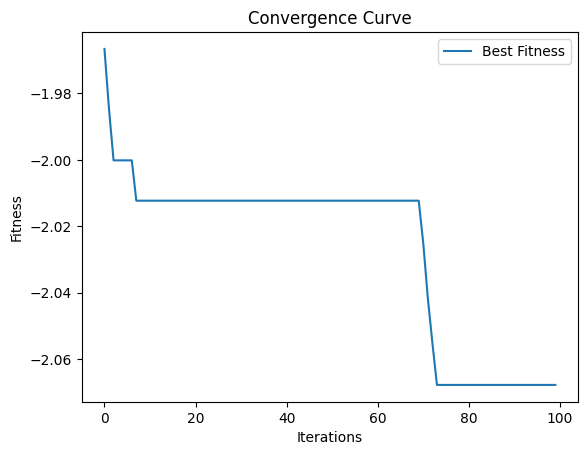

Best MOF from LEA: [0.75697244 0.64940619 0.81300194 0.89529201 0.47349934] Fitness: -2.0678564797230483
Best MOF from DE: [1. 1. 1. 1. 1.] Fitness: -2.5999999999999996


In [4]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from scipy.special import gamma
from scipy.optimize import differential_evolution

# Load MOF dataset
file_path = "MOF.csv"
df = pd.read_csv(file_path)

# Extract relevant columns
features = ['void_fraction', 'asa (A^2)', 'pld (A)', 'max_metal_coordination_n', 'n_sbu_point_of_extension']
df = df[features]

# Normalize data (0 to 1)
df = (df - df.min()) / (df.max() - df.min())

# Define fitness function
def fitness_function(solution):
    porosity_score = solution[0] + solution[1] + solution[2]  # Maximize porosity
    stability_score = solution[3] + solution[4]  # Maximize stability
    return - (porosity_score * 0.6 + stability_score * 0.4)  # Negative for minimization

# Lotus Effect Algorithm (LEA) Class
class LotusEffectAlgorithm:
    def __init__(self, population_size, dimensions, max_iterations, fitness_function):
        self.population_size = population_size
        self.dimensions = dimensions
        self.max_iterations = max_iterations
        self.population = np.random.rand(population_size, dimensions)
        self.best_solution = None
        self.best_fitness = float('inf')
        self.fitness_function = fitness_function
        self.fitness_history = []

    def levy_flight(self):
        beta = 1.5
        sigma = (gamma(1 + beta) * np.sin(np.pi * beta / 2) /
                (gamma((1 + beta) / 2) * beta * 2**((beta - 1) / 2)))**(1 / beta)
        u = np.random.normal(0, sigma, size=self.dimensions)
        v = np.random.normal(0, 1, size=self.dimensions)
        return 0.01 * (u / np.abs(v)**(1 / beta))

    def optimize(self):
        for iteration in range(self.max_iterations):
            for i in range(self.population_size):
                self.population[i] += self.levy_flight()
                self.population[i] = np.clip(self.population[i], 0, 1)
                fitness = self.fitness_function(self.population[i])
                if fitness < self.best_fitness:
                    self.best_fitness = fitness
                    self.best_solution = self.population[i]
            self.fitness_history.append(self.best_fitness)
        return self.best_solution, self.best_fitness

    def plot_convergence(self):
        plt.plot(self.fitness_history, label='Best Fitness')
        plt.xlabel('Iterations')
        plt.ylabel('Fitness')
        plt.title('Convergence Curve')
        plt.legend()
        plt.show()

# Run LEA
lea = LotusEffectAlgorithm(population_size=30, dimensions=5, max_iterations=100, fitness_function=fitness_function)
best_solution, best_fitness = lea.optimize()
lea.plot_convergence()

# Differential Evolution (DE) for comparison
de_result = differential_evolution(fitness_function, bounds=[(0,1)] * 5)
de_fitness = de_result.fun

# Print results
print("Best MOF from LEA:", best_solution, "Fitness:", best_fitness)
print("Best MOF from DE:", de_result.x, "Fitness:", de_fitness)
